**Antonio Martínez Payá**

# Homework 5: Regression with Gaussian Processes

------------------------------------------------------
*Machine Learning, Master in Big Data Analytics, 2017-2018*

*Pablo M. Olmos olmos@tsc.uc3m.es*

------------------------------------------------------

The aim of this homework is to solve a real data problem using the Gaussian Process implementation of GPy. The documentation of GPy is avaialable from the [SheffieldML github page](https://github.com/SheffieldML/GPy) or from [this page](http://gpy.readthedocs.org/en/latest/). 

The problem is the prediction of the house prices using the Housing Data Set from  <a href = https://archive.ics.uci.edu/ml/datasets/Housing>  UCI repository</a> that you can also download from scikit learn <a href = http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html> here</a>.


### 1. Loading and preparing the data (1 point)

* Download the dataset
* Divide the dataset into train (400) and test (106) datasets
* Check the range of prices in the train and test datasets

In [14]:
import numpy as np
import GPy
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import random

In [16]:
boston = load_boston()
print (boston.data.shape)

(506, 13)


Once the boston dataset is loaded we divide it into train and test:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.209, random_state=2)

We can check train and test ranges, noting that both are equal (with random_state = 2):

In [6]:
print("Train price range is from ",np.min(y_train)," to ",np.max(y_train))
print("Test price range is from ",np.min(y_test)," to ",np.max(y_test))

Train price range is from  5.0  to  50.0
Test price range is from  5.0  to  50.0


### 2. Setting and optimizing the model

On the training data set:

a) Build a GP regression model based on a RBF kernel with ARD, in which each input dimension is weighted with a different lengthscale. This enhances interpretability. **2 points**

b) Fit the covariance function parameters and noise to the data. **1 point** 

c) Plot the parameters found for the covariance function. What variables are more important for the regression? **2 points**

On the test data set:

d) Plot and evaluate the prediction error using the opmitized parameters. **2 points**

2) Try to combine various covariance functions using the element-wise product or the sum of two kernels, and repeat steps b) and c). Comments the results. **2 points**

In this [link](http://nbviewer.jupyter.org/github/SheffieldML/notebook/blob/master/GPy/basic_kernels.ipynb) you can see how to define differnt kernels and operate with them.

a) Build a GP regression model based on a RBF kernel with ARD, in which each input dimension is weighted with a different lengthscale. This enhances interpretability. **2 points**

In [17]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

With the following line codes we define the kernel and the model used:

In [36]:
ker = GPy.kern.RBF(input_dim=13,ARD=True) 

ker = ker + GPy.kern.White(13)

m = GPy.models.GPRegression(X_train,y_train,ker) 

In [37]:
display(m)

GP_regression.,value,constraints,priors
sum.rbf.variance,1.0,+ve,
sum.rbf.lengthscale,"(13,)",+ve,
sum.white.variance,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


b) Fit the covariance function parameters and noise to the data. **1 point** 


In [38]:
m.optimize(messages=True, max_f_eval = 1000)

m.optimize_restarts(num_restarts = 10)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s19  0003   1.906684e+04   1.871773e+07 
    03s31  0058   1.335108e+03   6.761811e+01 
    06s46  0115   1.240216e+03   7.372156e-01 
    08s22  0146   1.226306e+03   8.581526e-04 
Runtime:     08s22
Optimization status: Converged



 C:\Users\Tono\Anaconda2\envs\TonitoPython3\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 1/10, f = 1226.3060118817966


 C:\Users\Tono\Anaconda2\envs\TonitoPython3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Optimization restart 2/10, f = 1120.3618387737815
Optimization restart 3/10, f = 1522.1282122401603
Optimization restart 4/10, f = 1045.5414666587722
Optimization restart 5/10, f = 1047.5197907293868
Optimization restart 6/10, f = 1086.9059821838312
Optimization restart 7/10, f = 1046.2578337465816
Optimization restart 8/10, f = 1241.5389906414664


 C:\Users\Tono\Anaconda2\envs\TonitoPython3\lib\site-packages\GPy\kern\src\stationary.py:136: RuntimeWarning:overflow encountered in square
 C:\Users\Tono\Anaconda2\envs\TonitoPython3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:invalid value encountered in add
 C:\Users\Tono\Anaconda2\envs\TonitoPython3\lib\site-packages\GPy\kern\src\stationary.py:165: RuntimeWarning:overflow encountered in true_divide


Optimization restart 9/10, f = 1349.7766595088958
Optimization restart 10/10, f = 1606.8934035661932


In [39]:
display(m)

GP_regression.,value,constraints,priors
sum.rbf.variance,454.8032210196912,+ve,
sum.rbf.lengthscale,"(13,)",+ve,
sum.white.variance,4.004572868865723,+ve,
Gaussian_noise.variance,9.302365297100565e-26,+ve,


c) Plot the parameters found for the covariance function. What variables are more important for the regression? **2 points**

In [44]:
ker.input_sensitivity()

array([3.65194222e-03, 2.83598500e-04, 4.44340527e-04, 2.66708983e-03,
       7.46476198e+03, 4.39802558e+01, 5.46043874e-03, 1.20666110e+02,
       2.60614116e-02, 4.38065241e-03, 2.22400747e+00, 4.09608099e-03,
       1.27163314e+00])

In [45]:
m.grep_param_names(regexp="")

 GP_regression.sum.rbf.variance:
 Param([454.80322102]),
 GP_regression.sum.rbf.lengthscale:
 Param([3.52898504e+02, 1.26636763e+03, 1.01170478e+03, 4.12945696e+02,
        2.46833319e-01, 3.21575453e+00, 2.88601109e+02, 1.94141826e+00,
        1.32103036e+02, 3.22212488e+02, 1.43002505e+01, 3.33217267e+02,
        1.89117120e+01]),
 GP_regression.sum.white.variance:
 Param([4.00457287]),
 GP_regression.Gaussian_noise.variance:
 Param([9.3023653e-26])]

In [46]:
m.get_most_significant_input_dimensions()

(4, 7, 5)

In [47]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


The most important variables according to the sensitivity and the lenghtscale are:

1. NOX
2. DIS
3. RM


On the test data set:

d) Plot and evaluate the prediction error using the opmitized parameters. **2 points**

In [48]:
posterior = m.posterior_samples_f(X_test, full_cov=True, size=3)
meanYtest,a = m.predict(X_test,full_cov=True)

<IPython.core.display.Javascript object>


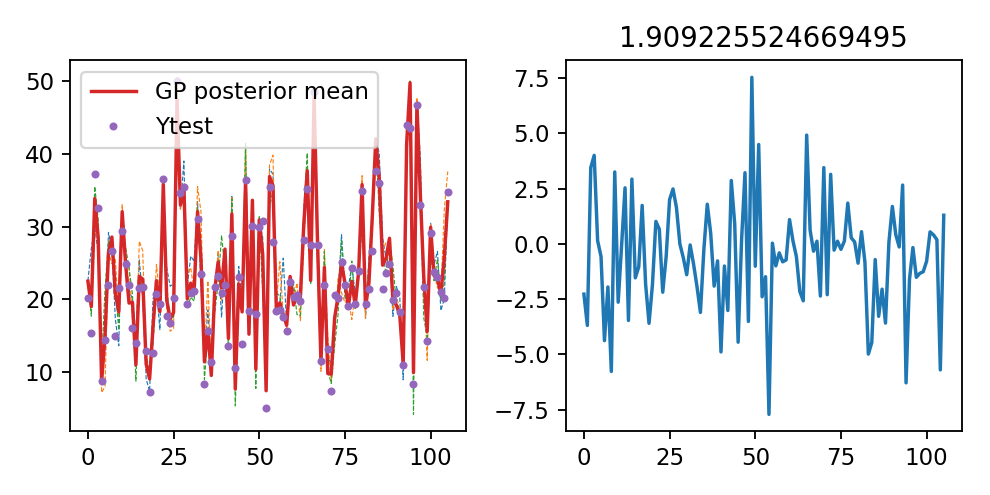

Text(0.5,1,'1.909225524669495')

In [50]:
figure, axes = plt.subplots(1,2, figsize=(6,3), tight_layout=True)

# plot 1 - observed vs predicted
plt.subplot(1,2,1)
plt.plot(posterior,'--',lw=0.5)
plt.plot(meanYtest,label='GP posterior mean')
plt.plot(y_test.reshape((-1, 1)),'.',ms=5,label='Ytest')
plt.legend()

# plot 2 - residulas vs observed
plt.subplot(1,2,2)
plt.plot((y_test.reshape((-1, 1))-meanYtest))
plt.title(mean_absolute_error(y_test.reshape((-1, 1)),meanYtest))

2) Try to combine various covariance functions using the element-wise product or the sum of two kernels, and repeat steps b) and c). Comments the results. **2 points**

<IPython.core.display.Javascript object>


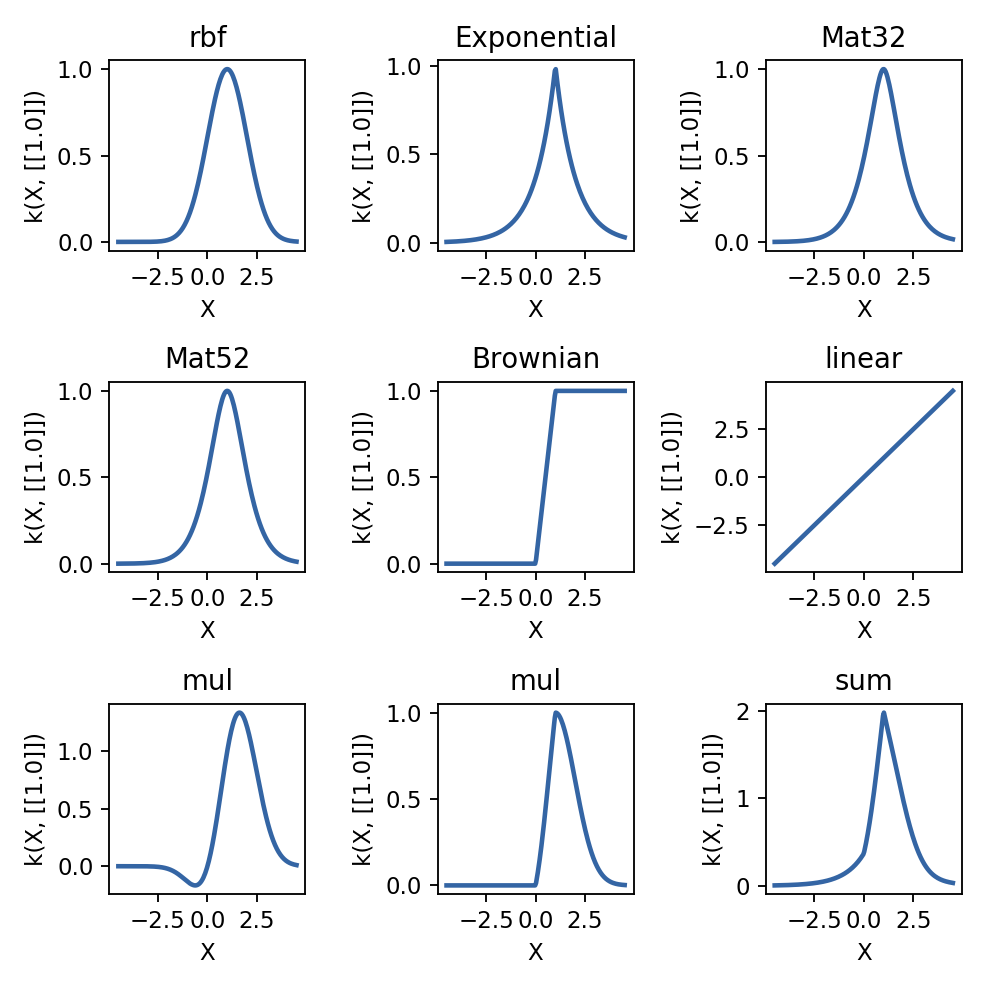

In [52]:
figure, axes = plt.subplots(3,3, figsize=(6,6), tight_layout=True)
kerns = [GPy.kern.RBF(1), GPy.kern.Exponential(1), GPy.kern.Matern32(1), GPy.kern.Matern52(1), GPy.kern.Brownian(1)
         , GPy.kern.Linear(1),GPy.kern.RBF(1)*GPy.kern.Linear(1),GPy.kern.Brownian(1)*GPy.kern.RBF(1),
        GPy.kern.RBF(1)*GPy.kern.Brownian(1)+GPy.kern.Exponential(1)]
for k,a in zip(kerns, axes.flatten()):
    k.plot(ax=a, x=1)
    a.set_title(k.name.replace('_', ' '))
plt.show()

We can try for example to sum two kernels:

In [55]:
ker_rbf = GPy.kern.RBF(13, ARD=True)
ker_mat= GPy.kern.Matern32(13, ARD=True)
kernel_sum = ker_rbf + ker_mat
model_sum = GPy.models.GPRegression(X_train,y_train,kernel_sum)
model_sum.optimize(messages=True,max_f_eval = 1000)
model_sum.optimize_restarts(num_restarts = 10)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    01s19  0010   3.321123e+03   6.581744e+03 
    05s40  0063   1.066634e+03   3.787893e+01 
    10s57  0138           nan           nan 1 

 C:\Users\Tono\Anaconda2\envs\TonitoPython3\lib\site-packages\GPy\kern\src\stationary.py:165: RuntimeWarning:overflow encountered in true_divide
 C:\Users\Tono\Anaconda2\envs\TonitoPython3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:invalid value encountered in add
 C:\Users\Tono\Anaconda2\envs\TonitoPython3\lib\site-packages\paramz\optimization\verbose_optimization.py:38: RuntimeWarning:invalid value encountered in sign
 C:\Users\Tono\Anaconda2\envs\TonitoPython3\lib\site-packages\paramz\optimization\verbose_optimization.py:160: RuntimeWarning:invalid value encountered in less
 C:\Users\Tono\Anaconda2\envs\TonitoPython3\lib\site-packages\GPy\kern\src\stationary.py:136: RuntimeWarning:overflow encountered in square


    11s57  0152           nan           nan 
    20s88  0285   1.008904e+03   1.105486e-02 
    58s22  0833   1.003513e+03   9.536402e-03 
 01m10s03  1002   1.003253e+03   1.606430e-03 
Runtime:  01m10s03
Optimization status: Maximum number of f evaluations reached



 C:\Users\Tono\Anaconda2\envs\TonitoPython3\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 1/10, f = 1000.8970587820396
Optimization restart 2/10, f = 1032.17279380377
Optimization restart 3/10, f = 1000.7451326317353
Optimization restart 4/10, f = 1241.7370328220466
Optimization restart 5/10, f = 1198.7907172988257
Optimization restart 6/10, f = 1106.654542370472


 C:\Users\Tono\Anaconda2\envs\TonitoPython3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Optimization restart 7/10, f = 1012.6680425808686
Optimization restart 8/10, f = 1153.1067799599155
Optimization restart 9/10, f = 1044.7072914398136
Optimization restart 10/10, f = 1169.0347330294032


In [57]:
posterior = model_sum.posterior_samples_f(X_test, full_cov=True, size=3)
meanYtest,a = model_sum.predict(X_test,full_cov=True)

<IPython.core.display.Javascript object>


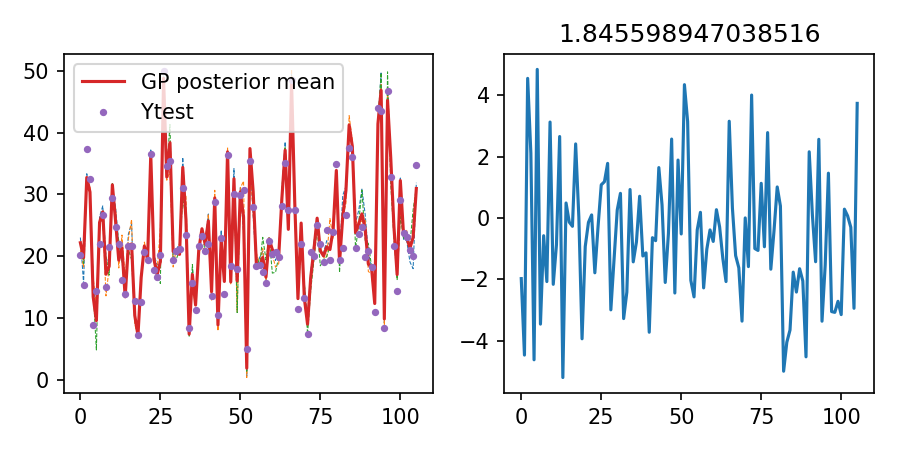

Text(0.5,1,'1.845598947038516')

In [58]:
figure, axes = plt.subplots(1,2, figsize=(6,3), tight_layout=True)

# plot 1 - observed vs predicted
plt.subplot(1,2,1)
plt.plot(posterior,'--',lw=0.5)
plt.plot(meanYtest,label='GP posterior mean')
plt.plot(y_test.reshape((-1, 1)),'.',ms=5,label='Ytest')
plt.legend()

# plot 2 - residulas vs observed
plt.subplot(1,2,2)
plt.plot((y_test.reshape((-1, 1))-meanYtest))
plt.title(mean_absolute_error(y_test.reshape((-1, 1)),meanYtest))

MAE has been reduced a little bit.

Now we can try with the multiplication:

In [59]:
kernel_multi = ker_rbf * ker_mat
model_multi = GPy.models.GPRegression(X_train,y_train,kernel_multi)
model_multi.optimize(messages=True,max_f_eval = 1000)
model_multi.optimize_restarts(num_restarts = 10)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s07  0001   5.921637e+04   1.026495e+09 
    01s19  0014   1.852831e+03   2.555877e+01 
    02s20  0026   1.604348e+03   8.457273e-01 

 C:\Users\Tono\Anaconda2\envs\TonitoPython3\lib\site-packages\GPy\kern\src\stationary.py:136: RuntimeWarning:overflow encountered in square
 C:\Users\Tono\Anaconda2\envs\TonitoPython3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:invalid value encountered in add
 C:\Users\Tono\Anaconda2\envs\TonitoPython3\lib\site-packages\GPy\kern\src\stationary.py:165: RuntimeWarning:overflow encountered in true_divide


    03s21  0041           nan           nan 

 C:\Users\Tono\Anaconda2\envs\TonitoPython3\lib\site-packages\paramz\optimization\verbose_optimization.py:38: RuntimeWarning:invalid value encountered in sign
 C:\Users\Tono\Anaconda2\envs\TonitoPython3\lib\site-packages\paramz\optimization\verbose_optimization.py:160: RuntimeWarning:invalid value encountered in less


    05s24  0071   1.222031e+03   2.040960e-01 
    05s66  0077   1.222031e+03   2.040960e-01 
Runtime:     05s66
Optimization status: Converged



 C:\Users\Tono\Anaconda2\envs\TonitoPython3\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 1/10, f = 1142.8362244701823
Optimization restart 2/10, f = 1231.6010051562657
Optimization restart 3/10, f = 1597.3363201732889
Optimization restart 4/10, f = 1308.9733750817268
Optimization restart 5/10, f = 1343.1855070744718
Optimization restart 6/10, f = 1465.0113385141333
Optimization restart 7/10, f = 1402.4560757062072
Optimization restart 8/10, f = 1261.7659482933357
Optimization restart 9/10, f = 1158.941050221034
Optimization restart 10/10, f = 1043.49396044417


In [62]:
posterior = model_multi.posterior_samples_f(X_test, full_cov=True, size=3)
meanYtest,a = model_multi.predict(X_test,full_cov=True)

<IPython.core.display.Javascript object>


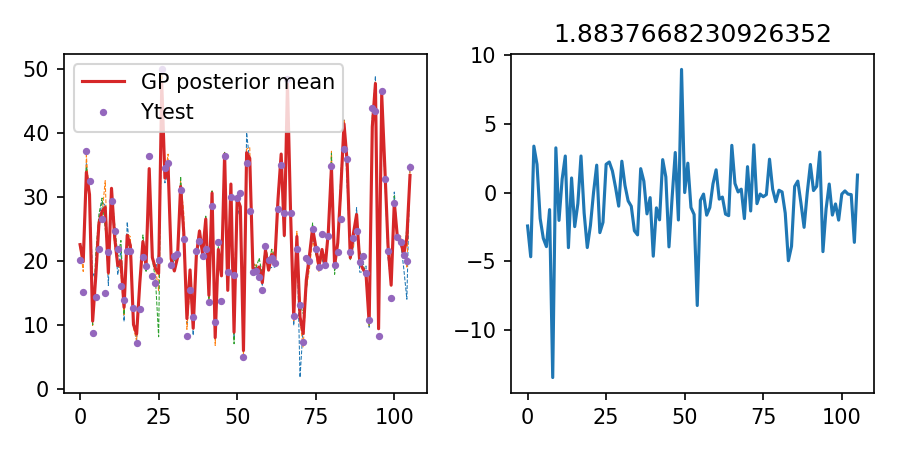

Text(0.5,1,'1.8837668230926352')

In [63]:
figure, axes = plt.subplots(1,2, figsize=(6,3), tight_layout=True)

# plot 1 - observed vs predicted
plt.subplot(1,2,1)
plt.plot(posterior,'--',lw=0.5)
plt.plot(meanYtest,label='GP posterior mean')
plt.plot(y_test.reshape((-1, 1)),'.',ms=5,label='Ytest')
plt.legend()

# plot 2 - residulas vs observed
plt.subplot(1,2,2)
plt.plot((y_test.reshape((-1, 1))-meanYtest))
plt.title(mean_absolute_error(y_test.reshape((-1, 1)),meanYtest))

MAE has been reduced too, but less than with the sum.